In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# There are 60 recordings
recording_ids = [str(idx) if not len(str(idx)) == 1 else '0' + str(idx) for idx in list(range(1,61))]
data_prefix = './data/'
image_suffix = '_highway.jpg'
recording_meta_suffix = '_recordingMeta.csv'
tracks_meta_suffix = '_tracksMeta.csv'
tracks_suffix = '_tracks.csv'

# Recordings Meta

|Name               |Description                      |Unit|
|:------------------|:--------------------------------|:---|
|id                 |The id of the recording. Every recording has a unique id.|[-]|
|frameRate          |The frame rate which was used to record the video.|[hz]|
|locationId         |The id of the recording location. In total six different locations exist in the dataset.|[-]|
|speedLimit         |The speed limit of the driving lanes. In all recordings, the speed limit is the same for every driving lane.|[m/s]|
|month              |The month the recording was done.|[-]|
|weekDay            |The week day the recording was done.|[-]|
|startTime          |The start time at which the recording was done.|[hh:mm]|
|duration           |The duration of the recording.|[s]|
|totalDrivenDistance|The total driven distance of all tracked vehicles.|[m]|
|totalDrivenTime    |The total driven time of all tracked vehicles.|[s]|
|numVehicles        |The number of vehicles tracked including cars and trucks.|[-]|
|numCars            |The number of cars tracked.|[-]|
|numTrucks          |The number of trucks tracked.|[-]|
|upperLaneMarkings  |The y positions of the upper lane markings. The positions are separated by a ";".|[m]|
|lowerLaneMarkings  |The y positions of the lower lane markings. The positions are separated by a ";".|[m]|

In [3]:
recording_meta_data_list = [pd.read_csv(data_prefix + idx + recording_meta_suffix) for idx in recording_ids]
recordings_meta_data = pd.concat(recording_meta_data_list).set_index('id')
recordings_meta_data

,frameRate,locationId,speedLimit,month,weekDay,startTime,duration,totalDrivenDistance,totalDrivenTime,numVehicles,numCars,numTrucks,upperLaneMarkings,lowerLaneMarkings
id,,,,,,,,,,,,,,
1,25,2,-1.00,9.2017,Tue,08:38,901.56,418549.19,13908.12,1047,863,184,8.51;12.59;16.43,21.00;24.96;28.80
2,25,2,-1.00,9.2017,Tue,09:04,1003.04,445570.50,15080.08,1113,852,261,8.67;12.51;16.35,21.03;24.88;28.72
3,25,2,-1.00,9.2017,Tue,09:54,1011.52,368101.36,12102.96,914,685,229,8.53;12.49;16.33,21.02;24.98;28.82
4,25,3,36.11,9.2017,Thu,11:16,1087.28,467788.55,15580.96,1163,823,340,13.15;16.97;20.62;24.35,26.35;30.09;33.65;37.56
5,25,3,36.11,9.2017,Thu,11:41,1143.28,486767.43,16052.88,1216,883,333,13.15;17.06;20.70;24.44,26.35;30.17;33.73;37.56
6,25,3,36.11,9.2017,Thu,12:06,1212.32,552436.40,18178.20,1368,1004,364,13.23;17.23;20.88;24.53,26.52;30.26;33.99;37.82
7,25,4,-1.00,9.2017,Fri,08:21,578.36,339559.20,10247.04,855,703,152,3.36;7.25;10.87;14.49,19.35;22.97;26.60;30.66
8,25,4,-1.00,9.2017,Fri,08:37,1093.24,643972.59,19225.28,1620,1305,315,3.53;7.50;11.13;14.75,19.70;23.23;27.03;30.92
9,25,4,-1.00,9.2017,Fri,09:24,1068.68,566614.10,17408.56,1420,1103,317,3.36;7.33;10.96;14.49,19.44;23.15;26.77;30.75


# Tracks Meta

|Name            |Description                      |Unit|
|:---------------|:--------------------------------|:---|
|id              |The id of the track. The ids are assigned in ascending order.|[-]|
|width           |The width of the post-processed bounding box of the vehicle. This corresponds to the length of the vehicle.|[m]|
|height          |The height of the post-processed bounding box of the vehicle. This corresponds to the width of the vehicle.|[m]|
|initialFrame    |The initial frame in which the vehicle track starts.|[-]|
|finalFrame      |The frame in which the track of the vehicle ends.|[-]|
|numFrames       |The total lifetime of the track as number of frames.|[-]|
|class           |The vehicle class of the tracked vehicle (Car or Truck).|[-]|
|drivingDirection|The driving direction of the vehicle. Either 1 for the left direction (upper lanes) or 2 for the right direction (lower lanes).|[-]|
|traveledDistance|The distance covered by the track.|[m]|
|minXVelocity    |The minimal velocity in driving direction.|[m/s]|
|maxXVelocity    |The maximal velocity in driving direction.|[m/s]|
|meanXVelocity   |The mean velocity in driving direction.|[m/s]|
|minDHW          |The minimal Distance Headway (DHW). This value is set to -1, if no preceding vehicle exists.|[m]|
|minTHW          |The minimal Time Headway (THW). This value is set to -1, if no preceding vehicle exists.|[s]|
|minTTC          |The minimal Time-to-Collision (TTC). This value is set to -1, if no preceding vehicle or valid TTC exists.|[s]|
|numLaneChanges  |Number of lane changes detected by changing lane id.|[-]|

In [4]:
track_meta_01 = pd.read_csv(data_prefix + recording_ids[0] + tracks_meta_suffix).set_index('id')
track_meta_01

,width,height,initialFrame,finalFrame,numFrames,class,drivingDirection,traveledDistance,minXVelocity,maxXVelocity,meanXVelocity,minDHW,minTHW,minTTC,numLaneChanges
id,,,,,,,,,,,,,,,
1,4.85,2.12,1,33,33,Car,2,52.25,40.85,41.30,41.07,-1.00,-1.00,-1.00,0
2,4.24,1.92,1,130,130,Car,1,167.44,32.04,32.90,32.48,112.62,3.51,-1.00,0
3,3.94,1.92,1,157,157,Car,2,225.23,35.69,36.50,36.13,90.31,2.53,-1.00,0
4,5.05,2.22,1,161,161,Car,1,273.49,42.57,42.83,42.76,-1.00,-1.00,-1.00,0
5,4.24,1.82,1,182,182,Car,1,313.92,42.50,44.26,43.40,33.64,0.76,24.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,7.38,2.53,22376,22539,164,Car,1,209.80,31.28,33.26,32.21,16.46,0.52,-1.00,0
1044,5.15,2.02,22383,22538,156,Car,2,233.81,37.03,39.03,37.75,63.66,1.68,45.59,0
1045,4.75,2.02,22456,22539,84,Car,1,112.72,33.95,34.21,34.01,91.27,2.67,52.71,0


# Tracks

|Name              |Description                      |Unit|
|:-----------------|:--------------------------------|:---|
|frame             |The current frame.|[-]|
|id                |The track's id.|[-]|
|x                 |The x position of the upper left corner of the vehicle's bounding box.|[m]|
|y                 |The y position of the upper left corner of the vehicle's bounding box.|[m]|
|width             |The width of the bounding box of the vehicle.|[m]|
|height            |The height of the bounding box of the vehicle.|[m]|
|xVelocity         |The longitudinal velocity in the image coordinate system.|[m/s]|
|yVelocity         |The lateral velocity in the image coordinate system.|[m/s]|
|xAcceleration     |The longitudinal acceleration in the image coordinate system.|[m/s]|
|yAcceleration     |The lateral acceleration in the image coordinate system|[m/s]|
|frontSightDistance|The distance to the end of the recorded highway section in driving direction from the vehicle's center.|[m]|
|backSightDistance |The distance to the end of the recorded highway section in the opposite driving direction from the vehicle's center.|[m]|
|dhw               |The Distance Headway. This value is set to 0, if no preceding vehicle exists.|[m]|
|thw               |The Time Headway. This value is set to 0, if no preceding vehicle exists.|[s]|
|ttc	           |The Time-to-Collision. This value is set to 0, if no preceding vehicle or valid TTC exists.|[s]|
|precedingXVelocity|The longitudinal velocity of the preceding in the image coordinate system. This value is set to 0, if no preceding vehicle exists.|[s]|
|precedingId       |The id of the preceding vehicle in the same lane. This value is set to 0, if no preceding vehicle exists.|[-]|
|followingId       |The id of the following vehicle in the same lane. This value is set to 0, if no following vehicle exists.|[-]|
|leftPrecedingId   |The id of the preceding vehicle on the adjacent lane on the left in the direction of travel. This value is set to 0, if no such a vehicle exists.|[-]|
|leftAlongsideId   |The id of the adjacent vehicle on the adjacent lane on the left in the direction of travel. In order for a vehicle to be adjacent and not e.g. preceding, the vehicles must overlap in the longitudinal direction. This value is set to 0, if no such a vehicle exists.|[-]|
|leftFollowingId   |The id of the following vehicle on the adjacent lane on the left in the direction of travel. This value is set to 0, if no such a vehicle exists.|[-]|
|rightPrecedingId  |The id of the preceding vehicle on the adjacent lane on the right in the direction of travel. This value is set to 0, if no such a vehicle exists.|[-]|
|rightAlsongsideId |The id of the adjacent vehicle on the adjacent lane on the right in the direction of travel. In order for a vehicle to be adjacent and not e.g. preceding, the vehicles must overlap in the longitudinal direction. This value is set to 0, if no such a vehicle exists.|[-]|
|rightFollowingId  |The id of the following vehicle on the adjacent lane on the right in the direction of travel. This value is set to 0, if no such a vehicle exists.|[-]|
|laneId            |The IDs start at 1 and are assigned in ascending order. Since the Lane ids are derived from the positions of the lane markings, the first and last ids typically do not describe any useable lanes. For details, see the definition of the coordinate system.|[-]|

In [5]:
tracks_01 = pd.read_csv(data_prefix + recording_ids[0] + tracks_suffix)
tracks_01

,frame,id,x,y,width,height,xVelocity,yVelocity,xAcceleration,yAcceleration,...,precedingXVelocity,precedingId,followingId,leftPrecedingId,leftAlongsideId,leftFollowingId,rightPrecedingId,rightAlongsideId,rightFollowingId,laneId
0,1,1,362.26,21.68,4.85,2.12,40.85,0.00,0.30,0.00,...,0.00,0,3,0,0,0,0,0,6,5
1,2,1,363.73,21.68,4.85,2.12,40.87,0.00,0.30,0.00,...,0.00,0,14,0,0,0,0,0,6,5
2,3,1,365.27,21.68,4.85,2.12,40.88,0.00,0.31,0.00,...,0.00,0,14,0,0,0,0,0,6,5
3,4,1,366.83,21.68,4.85,2.12,40.89,0.00,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
4,5,1,368.42,21.68,4.85,2.12,40.90,0.01,0.32,0.00,...,0.00,0,14,0,0,0,0,0,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348745,22535,1047,366.97,12.54,6.37,3.13,-35.63,0.19,-0.74,0.11,...,-34.18,1045,0,0,0,0,1039,0,0,3
348746,22536,1047,365.55,12.55,6.37,3.13,-35.66,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348747,22537,1047,364.12,12.56,6.37,3.13,-35.69,0.20,-0.74,0.11,...,-34.19,1045,0,0,0,0,1039,0,0,3
348748,22538,1047,362.69,12.57,6.37,3.13,-35.72,0.21,-0.74,0.11,...,-34.20,1045,0,0,0,0,1039,0,0,3


# Coordinate System

The global coordinate system used corresponds to the image coordinate system of the video recording. This means that the origin of the coordinate system is in the upper left corner, as shown in the image. The horizontal axis is the x-axis. This corresponds to the direction of travel of the vehicles and grows to the right. The vertical axis is the y-axis. However, this axis grows downwards. In addition no units in pixels are used, since all sizes were converted into SI units. The video recordings were stabilized so that the lane markings run horizontally in the image. Therefore, their positions can be indicated by a y-coordinate. The individual lanes were numbered starting with 1. The areas above the uppermost lane mark, between the driving directions and below the lowermost lane mark are also taken into account for counting. All data is given in the global coordinate system unless otherwise specified. This means that a vehicle on the upper lanes in the image is moving to the left and therefore has a negative speed in X direction.

<img src="coordinateSystem.png">

# Analyze the Data for Maneuvers
 - Free Driving (Longitudinal uninfluenced driving): Driving without being influenced by a preceding vehicle.
 - Vehicle Following (Longitudinal influenced driving): Actively following another vehicle.
 - Critical Maneuver: Low TTC or THW to a preceding vehicle
 - Lane Change: Crossing lane markings and staying on a new lane 

In [6]:
tracks_meta_data_list = [pd.read_csv(data_prefix + idx + tracks_meta_suffix) for idx in recording_ids]
free_tracks_list = [dataframe[(dataframe['minDHW'] == -1)] 
                    for dataframe in tracks_meta_data_list]
free_lanechanging_tracks_list = [dataframe[dataframe['numLaneChanges'] != 0] 
                                 for dataframe in free_tracks_list]

following_tracks_list = [dataframe[(dataframe['minDHW'] != -1) &
                                   (dataframe['numLaneChanges'] == 0)]
                         for dataframe in tracks_meta_data_list]

lanechanging_tracks_list = [dataframe[(dataframe['numLaneChanges'] != 0) & 
                                      (dataframe['minDHW'] != -1)] 
                            for dataframe in tracks_meta_data_list]

critical_thw_following_track_counts = np.array([
    len(dataframe[
        (dataframe['minTHW'] != -1) & (dataframe['minTHW'] <= 0.5)
    ].index) for dataframe in following_tracks_list])

critical_ttc_following_tracks_counts = np.array([
    len(dataframe[
        (dataframe['minTTC'] != -1) & (dataframe['minTTC'] <= 1.75)
    ].index) for dataframe in following_tracks_list])

critical_thw_ttc_following_tracks_ids = np.array([
    len(dataframe[
        (dataframe['minTHW'] != -1) & (dataframe['minTHW'] <= 0.5) &
        (dataframe['minTTC'] != -1) & (dataframe['minTTC'] <= 1.75)
    ].index) for dataframe in following_tracks_list])

critical_thw_lanechanging_track_counts = np.array([
    len(dataframe[
        (dataframe['minTHW'] != -1) & (dataframe['minTHW'] <= 0.5)
    ].index) for dataframe in lanechanging_tracks_list])

critical_ttc_lanechanging_tracks_counts = np.array([
    len(dataframe[
        (dataframe['minTTC'] != -1) & (dataframe['minTTC'] <= 1.75)
    ].index) for dataframe in lanechanging_tracks_list])

critical_thw_ttc_lanechanging_tracks_ids = np.array([
    len(dataframe[
        (dataframe['minTHW'] != -1) & (dataframe['minTHW'] <= 0.5) &
        (dataframe['minTTC'] != -1) & (dataframe['minTTC'] <= 1.75)
    ].index) for dataframe in lanechanging_tracks_list])


number_tracks = np.array([len(dataframe.index) for dataframe in tracks_meta_data_list])
free_counts = np.array([len(free_tracks.index) for free_tracks in free_tracks_list])
free_lanechanging_counts = np.array([len(free_lanechanging_tracks.index) 
                                     for free_lanechanging_tracks in free_lanechanging_tracks_list])
following_counts = np.array([len(following_tracks.index) for following_tracks in following_tracks_list])
critical_following_counts = critical_thw_following_track_counts + critical_ttc_following_tracks_counts - critical_thw_ttc_following_tracks_ids
non_critical_following_counts = following_counts - critical_following_counts
lanechanging_counts = np.array([len(lanechanging_tracks.index) for lanechanging_tracks in lanechanging_tracks_list])
critical_lanechanging_counts = critical_thw_lanechanging_track_counts + critical_ttc_lanechanging_tracks_counts - critical_thw_ttc_lanechanging_tracks_ids
non_critical_lanechanging_counts = lanechanging_counts - critical_lanechanging_counts

In [7]:
free_percent = np.round((free_counts / number_tracks) * 100, 2)
free_lanechanging_percent = np.round((free_lanechanging_counts / number_tracks) * 100, 2)
following_percent = np.round((following_counts / number_tracks) * 100, 2)
non_critical_following_percent = np.round((non_critical_following_counts / number_tracks) * 100, 2)
critical_following_percent = np.round((critical_following_counts / number_tracks) * 100, 2)
lanechange_percent = np.round((lanechanging_counts / number_tracks) * 100, 2)
non_critical_lanechange_percent = np.round((non_critical_lanechanging_counts / number_tracks) * 100, 2)
critical_lanechange_percent = np.round((critical_lanechanging_counts / number_tracks) * 100, 2)
total = free_percent + following_percent + lanechange_percent
#print('free_percent:', free_percent)
#print('following_percent:', following_percent)
#print('non_critical_following_percent:', non_critical_following_percent)
#print('critical_following_percent:', critical_following_percent)
#print('lanechange_percent:', lanechange_percent)
#print('non_critical_lanechange_percent:', non_critical_lanechange_percent)
#print('critical_lanechange_percent:', critical_lanechange_percent)
#print('total:', total)

free_percent_mean = round(np.mean(free_percent), 2)
free_lanechanging_percent_mean = round(np.mean(free_lanechanging_percent), 2)
following_percent_mean = round(np.mean(following_percent), 2)
non_critical_following_percent_mean = round(np.mean(non_critical_following_percent), 2)
critical_following_percent_mean = round(np.mean(critical_following_percent), 2)
lanechange_percent_mean = round(np.mean(lanechange_percent), 2)
non_critical_lanechange_percent_mean = round(np.mean(non_critical_lanechange_percent), 2)
critical_lanechange_percent_mean = round(np.mean(critical_lanechange_percent), 2)
total = free_percent_mean + following_percent_mean + lanechange_percent_mean
print('free_percent_mean:', free_percent_mean)
print('free_lanechanging_percent_mean:', free_lanechanging_percent_mean)
print('following_percent_mean:', following_percent_mean)
print('non_critical_following_percent_mean:', non_critical_following_percent_mean)
print('critical_following_percent_mean:', critical_following_percent_mean)
print('lanechange_percent_mean:', lanechange_percent_mean)
print('non_critical_lanechange_percent_mean:', non_critical_lanechange_percent_mean)
print('critical_lanechange_percent_mean:', critical_lanechange_percent_mean)
print('total:', total)

free_percent_mean: 1.82
free_lanechanging_percent_mean: 0.24
following_percent_mean: 85.83
non_critical_following_percent_mean: 80.68
critical_following_percent_mean: 5.14
lanechange_percent_mean: 12.35
non_critical_lanechange_percent_mean: 9.72
critical_lanechange_percent_mean: 2.63
total: 99.99999999999999


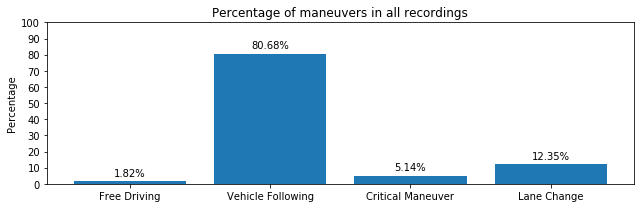

In [8]:
values = (free_percent_mean, 
          #free_lanechanging_percent_mean, 
          #following_percent_mean, 
          non_critical_following_percent_mean,
          critical_following_percent_mean,
          lanechange_percent_mean,
          #non_critical_lanechange_percent_mean,
          #critical_lanechange_percent_mean
         )
labels = ('Free Driving',
          #'Free Driving Lane Change'
          'Vehicle Following',
          #'Non-critical Vehicle Following',
          'Critical Maneuver',
          'Lane Change',
          #'Non-critical Lane Change',
          #'Critical Lane Change',
         )
colors = ('tab:blue', 
          #'tab:blue', 
          'tab:blue', 
          'tab:blue', 
          #'r', 
          'tab:blue', 
          #'tab:blue', 
          #'r'
         )
ind = np.arange(len(values))    # the x locations
width = 0.8       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(9,3))
ax.set_ylabel('Percentage')
ax.set_title('Percentage of maneuvers in all recordings')

ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_ylim([0,100])
ax.set_yticks(np.arange(0, 110, 10))

p1 = ax.bar(ind, values, width, color=colors)
for idx, value in enumerate(values):
    ax.annotate('{}%'.format(value),
                 xy=(idx, value),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
fig.tight_layout()
plt.savefig('raw_maneuvers')

plt.show()

# Analyze the Generated Dataset for Maneuvers
 - Free Driving (Longitudinal uninfluenced driving): Driving without being influenced by a preceding vehicle.
 - Vehicle Following (Longitudinal influenced driving): Actively following another vehicle.
 - Critical Maneuver: Low TTC or THW to a preceding vehicle
 - Lane Change: Crossing lane markings and staying on a new lane 

In [9]:
features_prefix = '../feature_extraction/'
min_dhw_small = pd.read_csv(features_prefix + 'features_dhw_only_lanechanging.csv', delimiter='\t', index_col=0)
min_thw_small = pd.read_csv(features_prefix + 'features_thw_only_lanechanging.csv', delimiter='\t', index_col=0)
min_ttc_small = pd.read_csv(features_prefix + 'features_ttc_only_lanechanging.csv', delimiter='\t', index_col=0)
min_dhw_big = pd.read_csv(features_prefix + 'features_dhw.csv', delimiter='\t', index_col=0)
min_thw_big = pd.read_csv(features_prefix + 'features_thw.csv', delimiter='\t', index_col=0)
min_ttc_big = pd.read_csv(features_prefix + 'features_ttc.csv', delimiter='\t', index_col=0)

In [10]:
def get_critical_non_critical_counts(dataframe):
    critical_thw_tracks = dataframe[(dataframe['min_thw'] != -1) & (dataframe['min_thw'] <= 0.5)]
    critical_ttc_tracks = dataframe[(dataframe['min_ttc'] != -1) & (dataframe['min_ttc'] <= 1.75)]
    critical_thw_ttc_tracks = dataframe[(dataframe['min_thw'] != -1) & 
                                        (dataframe['min_ttc'] != -1) & 
                                        (dataframe['min_thw'] <= 0.5) &
                                        (dataframe['min_ttc'] <= 1.75)]
    
    df_count = len(dataframe.index)
    critical_thw_counts = len(critical_thw_tracks.index)
    critical_ttc_counts = len(critical_ttc_tracks.index)
    critical_thw_ttc_counts = len(critical_thw_ttc_tracks.index)
    critical_counts = critical_thw_counts + critical_ttc_counts - critical_thw_ttc_counts
    non_critical_counts = df_count - critical_counts
    
    return df_count, critical_counts, non_critical_counts

def get_maneuver_percentages(dataframe):
    free_tracks = dataframe[dataframe['min_dhw'] == -1]
    free_lanechanging_tracks = dataframe[(dataframe['min_dhw'] == -1) & (dataframe['ego_lane_change'] != 0)]
    following_tracks = dataframe[(dataframe['min_dhw'] != -1) & (dataframe['ego_lane_change'] == 0)]
    lanechanging_tracks = dataframe[(dataframe['min_dhw'] != -1) & (dataframe['ego_lane_change'] != 0)]
    
    number_tracks = len(dataframe.index)
    free_counts = len(free_tracks.index)
    free_lanechanging_counts = len(free_lanechanging_tracks.index)
    following_counts, critical_following_counts, non_crit_following_counts = get_critical_non_critical_counts(following_tracks)
    lanechanging_counts, critical_lanechanging_counts, non_crit_lanechanging_counts = get_critical_non_critical_counts(lanechanging_tracks)
    
    free_percent = round(free_counts / number_tracks * 100, 2)
    free_lanechanging_percent = round(free_lanechanging_counts / number_tracks * 100, 2)
    following_percent = round(following_counts / number_tracks * 100, 2)
    critical_following_percent = round(critical_following_counts / number_tracks * 100, 2)
    non_critical_following_percent = round(non_crit_following_counts / number_tracks * 100, 2)
    lanechange_percent = round(lanechanging_counts / number_tracks * 100, 2)
    critical_lanechange_percent = round(critical_lanechanging_counts / number_tracks * 100, 2)
    non_critical_lanechange_percent = round(non_crit_lanechanging_counts / number_tracks * 100, 2)
    total = free_percent + following_percent + lanechange_percent
    
    return {
        'free_percent': free_percent,
        'free_lanechanging_percent': free_lanechanging_percent,
        'following_percent': following_percent,
        'critical_following_percent': critical_following_percent,
        'non_critical_following_percent': non_critical_following_percent,
        'lanechange_percent': lanechange_percent,
        'critical_lanechange_percent': critical_lanechange_percent,
        'non_critical_lanechange_percent': non_critical_lanechange_percent,
        'total': total,
    }

def print_maneuver_percentages(percentages):
    print('free_percent:', percentages['free_percent'])
    print('free_lanechanging_percent:', percentages['free_lanechanging_percent'])
    print('following_percent:', percentages['following_percent'])
    print('critical_following_percent:', percentages['critical_following_percent'])
    print('non_critical_following_percent:', percentages['non_critical_following_percent'])
    print('lanechange_percent:', percentages['lanechange_percent'])
    print('critical_lanechange_percent:', percentages['critical_lanechange_percent'])
    print('non_critical_lanechange_percent:', percentages['non_critical_lanechange_percent'])
    print('total:', percentages['total'])


In [11]:
min_dhw_small_percentages = get_maneuver_percentages(min_dhw_small)
print('Min DHW Small Dataset Percentages:')
print_maneuver_percentages(min_dhw_small_percentages)
print('\n')

min_thw_small_percentages = get_maneuver_percentages(min_thw_small)
print('Min THW Small Dataset Percentages:')
print_maneuver_percentages(min_thw_small_percentages)
print('\n')

min_ttc_small_percentages = get_maneuver_percentages(min_ttc_small)
print('Min TTC Small Dataset Percentages:')
print_maneuver_percentages(min_ttc_small_percentages)
print('\n')

min_dhw_big_percentages = get_maneuver_percentages(min_dhw_big)
print('Min DHW Big Dataset Percentages:')
print_maneuver_percentages(min_dhw_big_percentages)
print('\n')

min_thw_big_percentages = get_maneuver_percentages(min_thw_big)
print('Min THW Big Dataset Percentages:')
print_maneuver_percentages(min_thw_big_percentages)
print('\n')

min_ttc_big_percentages = get_maneuver_percentages(min_ttc_big)
print('Min TTC Big Dataset Percentages:')
print_maneuver_percentages(min_ttc_big_percentages)
print('\n')


Min DHW Small Dataset Percentages:
free_percent: 36.23
free_lanechanging_percent: 23.24
following_percent: 14.2
critical_following_percent: 0.4
non_critical_following_percent: 13.8
lanechange_percent: 49.56
critical_lanechange_percent: 8.44
non_critical_lanechange_percent: 41.12
total: 99.99


Min THW Small Dataset Percentages:
free_percent: 35.34
free_lanechanging_percent: 23.09
following_percent: 13.57
critical_following_percent: 0.38
non_critical_following_percent: 13.19
lanechange_percent: 51.09
critical_lanechange_percent: 8.42
non_critical_lanechange_percent: 42.67
total: 100.0


Min TTC Small Dataset Percentages:
free_percent: 37.22
free_lanechanging_percent: 23.62
following_percent: 13.41
critical_following_percent: 0.17
non_critical_following_percent: 13.24
lanechange_percent: 49.37
critical_lanechange_percent: 7.16
non_critical_lanechange_percent: 42.22
total: 100.0


Min DHW Big Dataset Percentages:
free_percent: 39.21
free_lanechanging_percent: 3.4
following_percent: 53.54


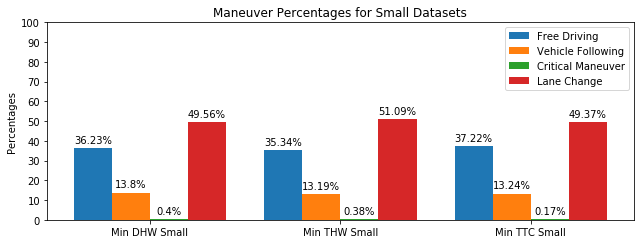

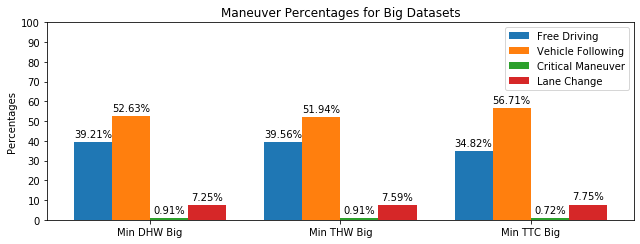

In [12]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def plot_maneuver_statistics(dhw_dataset_percentages, thw_dataset_percentages, 
                             ttc_dataset_percentages, dataset_size='Small'):
    
    labels = ['Min DHW %s'%dataset_size, 'Min THW %s'%dataset_size, 'Min TTC %s'%dataset_size]
    
    
    free_percentages = [dhw_dataset_percentages['free_percent'], 
                        thw_dataset_percentages['free_percent'],
                        ttc_dataset_percentages['free_percent']]
    following_percentages = [dhw_dataset_percentages['non_critical_following_percent'], 
                             thw_dataset_percentages['non_critical_following_percent'],
                             ttc_dataset_percentages['non_critical_following_percent']]
    critical_percentages = [dhw_dataset_percentages['critical_following_percent'], 
                            thw_dataset_percentages['critical_following_percent'],
                            ttc_dataset_percentages['critical_following_percent']]
    lanechange_percentages = [dhw_dataset_percentages['lanechange_percent'], 
                              thw_dataset_percentages['lanechange_percent'],
                              ttc_dataset_percentages['lanechange_percent']]

    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(9,3.5))
    free_group = ax.bar(x - (width * 3/4), free_percentages, width/2, label='Free Driving')
    following_group = ax.bar(x - (width * 1/4), following_percentages, width/2, label='Vehicle Following')
    critical_group = ax.bar(x + (width * 1/4), critical_percentages, width/2, label='Critical Maneuver')
    lanechange_group = ax.bar(x + (width * 3/4), lanechange_percentages, width/2, label='Lane Change')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Maneuver Percentages for %s Datasets'%dataset_size)
    ax.set_ylabel('Percentages')
    ax.set_ylim([0,100])
    ax.set_yticks(np.arange(0, 110, 10))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(free_group, ax)
    autolabel(following_group, ax)
    autolabel(critical_group, ax)
    autolabel(lanechange_group, ax)

    fig.tight_layout()
    plt.savefig('%s_datasets_maneuvers'%dataset_size.lower())
    plt.show()
    
plot_maneuver_statistics(min_dhw_small_percentages, min_thw_small_percentages, min_ttc_small_percentages, dataset_size='Small')
plot_maneuver_statistics(min_dhw_big_percentages, min_thw_big_percentages, min_ttc_big_percentages, dataset_size='Big')